In [2]:
import pandas as pd
import re
import numpy as np
import re
import pycountry

RES_SCOPUS = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Scopus/RES_SCOPUS.xlsx')
RES_SCOPUS_filtered = RES_SCOPUS[['year','affiliations']]
RES_SCOPUS_filtered.head()

# create a pattern that will match any country in pycountry.countries
names = '|'.join([country.name for country in pycountry.countries])
pattern = re.compile(names, re.UNICODE | re.IGNORECASE)

RES_SCOPUS_filtered = RES_SCOPUS_filtered.replace(np.nan, '', regex=True)

for i in range(len(RES_SCOPUS_filtered)):
    x = RES_SCOPUS_filtered.iat[i,1]
    #companies = ['XGLOW Japan', 'GOGO China', 'DALO germany', 'XTTTIndia']

    # apply sub for each company
    RES_SCOPUS_filtered.iat[i,1] = pattern.sub("", x).strip()
    #print(RES_SCOPUS_filtered.iat[i,1])

print(RES_SCOPUS_filtered.tail())

#Creating a new line split in the data
list = RES_SCOPUS_filtered.affiliations.str.split("\n", expand = True)
RES_SCOPUS_filtered['aff1'] = list[0]
RES_SCOPUS_filtered['aff2'] = list[1] 
RES_SCOPUS_filtered['aff3'] = list[2] 
RES_SCOPUS_filtered['aff4'] = list[3] 
RES_SCOPUS_filtered['aff5'] = list[4] 
RES_SCOPUS_filtered['aff6'] = list[5] 
RES_SCOPUS_filtered['aff7'] = list[6] 
RES_SCOPUS_filtered.tail()


      year                                       affiliations
2827  2020  a--University of California Davis, NBER, CEPR,...
2828  2020  a--Paris School of Economics, \nb--Faculty of ...
2829  2020  a--IIES and CEPR, \nb--IMF, \nc--IIES, CEPR, a...
2830  2020  a--Northwestern University and Nber, \nb--Yale...
2831  2020    Universidad Nacional Autónoma de México (UNAM),


,year,affiliations,aff1,aff2,aff3,aff4,aff5,aff6,aff7
2827,2020,"a--University of California Davis, NBER, CEPR,...","a--University of California Davis, NBER, CEPR,","b--Bank of ,","c--London Business School, CEPR,",None,None,None,None
2828,2020,"a--Paris School of Economics, \nb--Faculty of ...","a--Paris School of Economics,","b--Faculty of Business and Economics, Universi...","c--Paris School of Economics (EHESS),",None,None,None,None
2829,2020,"a--IIES and CEPR, \nb--IMF, \nc--IIES, CEPR, a...","a--IIES and CEPR,","b--IMF,","c--IIES, CEPR, and NBER,","d--Uppsala University and UCLS,",None,None,None
2830,2020,"a--Northwestern University and Nber, \nb--Yale...","a--Northwestern University and Nber,","b--Yale University and Nber,",None,None,None,None,None
2831,2020,"Universidad Nacional Autónoma de México (UNAM),","Universidad Nacional Autónoma de México (UNAM),",None,None,None,None,None,None


In [3]:
import numpy as np
RES_SCOPUS_filtered = RES_SCOPUS_filtered.replace(np.nan, '', regex=True)

#Removing the a--,b--,c-- and d-- as well as Stripping leading space and putting in title case
for i in range(len(RES_SCOPUS_filtered)):
    RES_SCOPUS_filtered.iat[i,2] = RES_SCOPUS_filtered.iat[i,2].replace("a--","").strip().title()
    RES_SCOPUS_filtered.iat[i,2] = RES_SCOPUS_filtered.iat[i,2].rstrip(',')

    RES_SCOPUS_filtered.iat[i,3] = RES_SCOPUS_filtered.iat[i,3].replace("b--","").strip().title()
    RES_SCOPUS_filtered.iat[i,3] = RES_SCOPUS_filtered.iat[i,3].rstrip(',')

    RES_SCOPUS_filtered.iat[i,4] = RES_SCOPUS_filtered.iat[i,4].replace("c--","").strip().title()
    RES_SCOPUS_filtered.iat[i,4] = RES_SCOPUS_filtered.iat[i,4].rstrip(',')

    RES_SCOPUS_filtered.iat[i,5] = RES_SCOPUS_filtered.iat[i,5].replace("d--","").strip().title()
    RES_SCOPUS_filtered.iat[i,5] = RES_SCOPUS_filtered.iat[i,5].rstrip(',')

    RES_SCOPUS_filtered.iat[i,6] = RES_SCOPUS_filtered.iat[i,6].replace("e--","").strip().title()
    RES_SCOPUS_filtered.iat[i,6] = RES_SCOPUS_filtered.iat[i,6].rstrip(',')

    RES_SCOPUS_filtered.iat[i,7] = RES_SCOPUS_filtered.iat[i,7].replace("f--","").strip().title()
    RES_SCOPUS_filtered.iat[i,7] = RES_SCOPUS_filtered.iat[i,7].rstrip(',')

RES_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered.xlsx')


In [5]:
#Splitting the first affiliation into multiple columns based on an and

list = RES_SCOPUS_filtered.aff1.str.split(", ", expand = True)
print(list.shape)
RES_SCOPUS_filtered = RES_SCOPUS_filtered.replace(np.nan, '', regex=True)
RES_SCOPUS_filtered['aff11'] = list[0]
RES_SCOPUS_filtered['aff12'] = list[1] 
RES_SCOPUS_filtered['aff13'] = list[2] 
RES_SCOPUS_filtered['aff14'] = list[3] 
RES_SCOPUS_filtered['aff15'] = list[4] 
RES_SCOPUS_filtered['aff16'] = list[5] 
#RES_SCOPUS_filtered.tail()

for i in range(len(RES_SCOPUS_filtered['aff11'])):
    if RES_SCOPUS_filtered['aff11'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff11'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff11'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff12'])):
    if RES_SCOPUS_filtered['aff12'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff12'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff12'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff13'])):
    if RES_SCOPUS_filtered['aff13'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff13'].iat[i]) < 3:
            RES_SCOPUS_filtered['aff13'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         RES_SCOPUS_filtered['aff12'].iat[i] = ''

#RES_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered2.xlsx')

(2832, 6)


In [7]:
list = RES_SCOPUS_filtered.aff2.str.split(", ", expand = True)
print(list.shape)
RES_SCOPUS_filtered = RES_SCOPUS_filtered.replace(np.nan, '', regex=True)
RES_SCOPUS_filtered['aff21'] = list[0]
RES_SCOPUS_filtered['aff22'] = list[1] 
RES_SCOPUS_filtered['aff23'] = list[2] 
RES_SCOPUS_filtered['aff24'] = list[3] 
RES_SCOPUS_filtered['aff25'] = list[4] 
#RES_SCOPUS_filtered.tail()

for i in range(len(RES_SCOPUS_filtered['aff21'])):
    if RES_SCOPUS_filtered['aff21'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff21'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff21'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff22'])):
    if RES_SCOPUS_filtered['aff22'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff22'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff22'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff23'])):
    if RES_SCOPUS_filtered['aff23'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff23'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff23'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         RES_SCOPUS_filtered['aff12'].iat[i] = ''

RES_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered2.xlsx')

(2832, 5)


In [8]:
list = RES_SCOPUS_filtered.aff3.str.split(", ", expand = True)
print(list.shape)
RES_SCOPUS_filtered = RES_SCOPUS_filtered.replace(np.nan, '', regex=True)
RES_SCOPUS_filtered['aff31'] = list[0]
RES_SCOPUS_filtered['aff32'] = list[1] 
RES_SCOPUS_filtered['aff33'] = list[2] 
RES_SCOPUS_filtered['aff34'] = list[3] 
RES_SCOPUS_filtered['aff35'] = list[4] 
RES_SCOPUS_filtered['aff36'] = list[5] 
RES_SCOPUS_filtered['aff37'] = list[6] 
#RES_SCOPUS_filtered.tail()

for i in range(len(RES_SCOPUS_filtered['aff31'])):
    if RES_SCOPUS_filtered['aff31'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff31'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff31'].iat[i] = ''
    else:
        RES_SCOPUS_filtered['aff31'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff32'])):
    if RES_SCOPUS_filtered['aff32'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff32'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff32'].iat[i] = ''
    else:
        RES_SCOPUS_filtered['aff32'].iat[i] = ''

for i in range(len(RES_SCOPUS_filtered['aff33'])):
    if RES_SCOPUS_filtered['aff33'].iat[i] is not None:
        if len(RES_SCOPUS_filtered['aff33'].iat[i].strip()) < 3:
            RES_SCOPUS_filtered['aff33'].iat[i] = ''
    else:
        RES_SCOPUS_filtered['aff33'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         RES_SCOPUS_filtered['aff12'].iat[i] = ''

RES_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered2.xlsx')

(2832, 8)


In [9]:
RES_SCOPUS_filtered_Final_test = RES_SCOPUS_filtered.head(100)
RES_SCOPUS_filtered_Final_test.head()

,year,affiliations,aff1,aff2,aff3,aff4,aff5,aff6,aff7,aff11,...,aff23,aff24,aff25,aff31,aff32,aff33,aff34,aff35,aff36,aff37
0,1940,"London,",London,,,,,,,London,...,,,,,,,None,None,None,None
1,1940,,,,,,,,,,...,,,,,,,None,None,None,None
2,1940,,,,,,,,,,...,,,,,,,None,None,None,None
3,1940,"London,",London,,,,,,,London,...,,,,,,,None,None,None,None
4,1940,"Berkeley, CA,","Berkeley, Ca",,,,,,,Berkeley,...,,,,,,,None,None,None,None


In [10]:
RES_SCOPUS_filtered_Final = RES_SCOPUS_filtered[['year','aff11','aff12','aff13',
                                                        'aff21','aff22','aff23',
                                                        'aff31','aff32','aff33']]
                                                      
RES_SCOPUS_filtered_Final.head()

RES_SCOPUS_filtered_Finalv2 = pd.DataFrame()

for j in range(1,9):
    for i in range(len(RES_SCOPUS_filtered_Final)):
        if RES_SCOPUS_filtered_Final.iat[i,j] != '':
            RES_SCOPUS_filtered_Finalv2 = RES_SCOPUS_filtered_Finalv2.append(
            {'year': RES_SCOPUS_filtered_Final.iat[i,0], 'Affilliation':RES_SCOPUS_filtered_Final.iat[i,j]}
            ,ignore_index=True)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/1960443357.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RES_SCOPUS_filtered_Finalv2 = RES_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/1960443357.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RES_SCOPUS_filtered_Finalv2 = RES_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/1960443357.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  RES_SCOPUS_filtered_Finalv2 = RES_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/1960443357.py:12: FutureWarning: The frame.append method is deprecated and will be 

In [11]:
# Additional split on and
list = RES_SCOPUS_filtered_Finalv2.Affilliation.str.split(" And ", expand = True)
print(list.shape)
combined_sorted = RES_SCOPUS_filtered_Finalv2
combined_sorted = combined_sorted.replace(np.nan, '', regex=True)

combined_sorted['aff1'] = list[0]
combined_sorted['aff2'] = list[1] 

for i in range(len(combined_sorted['aff1'])):
    if combined_sorted['aff1'].iat[i] is not None:
        if len(combined_sorted['aff1'].iat[i].strip()) < 3:
            combined_sorted['aff1'].iat[i] = ''
    else:
        combined_sorted['aff1'].iat[i] = ''

for i in range(len(combined_sorted['aff2'])):
    if combined_sorted['aff2'].iat[i] is not None:
        if len(combined_sorted['aff2'].iat[i].strip()) < 3:
            combined_sorted['aff2'].iat[i] = ''
    else:
        combined_sorted['aff2'].iat[i] = ''

    combined_sorted['aff1'].iat[i] = combined_sorted['aff1'].iat[i].replace("And ","").strip()

    combined_sorted['aff2'].iat[i] = combined_sorted['aff2'].iat[i].replace("And ","").strip()


combined_sorted_filtered = combined_sorted[['year','aff1','aff2']]
print(combined_sorted_filtered.shape)
print(combined_sorted_filtered.head)

combined_sorted_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/REScombined_sorted_filtered.xlsx')




(5882, 3)
(5882, 3)
<bound method NDFrame.head of       year                             aff1 aff2
0     1940                           London     
1     1940                           London     
2     1940                         Berkeley     
3     1940                           London     
4     1940                         Berkeley     
...    ...                              ...  ...
5877  2020                             Nber     
5878  2020                             Nber     
5879  2020  University Of Wisconsin-Madison     
5880  2020                             Cepr     
5881  2020                             Cepr     

[5882 rows x 3 columns]>


In [12]:
#Creating 1 column of all the affiliations

#Combining the 2 previos splits into 1 dataframe
combined_sorted_filtered_final = pd.DataFrame()

combined_sorted_filtered = combined_sorted_filtered.replace(np.nan, '', regex=True)

for j in range(1,3):
    for i in range(len(combined_sorted_filtered)):
        if combined_sorted_filtered.iat[i,j] != '':
            combined_sorted_filtered_final = combined_sorted_filtered_final.append(
            {'year': combined_sorted_filtered.iat[i,0], 'Affilliation':combined_sorted_filtered.iat[i,j]}
            ,ignore_index=True)
print(combined_sorted_filtered_final.shape)
combined_sorted_filtered_final.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_Final_test.xlsx')

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/3167005269.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/3167005269.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/3167005269.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_29857/3167005269.py:11: FutureWarning: The frame.append method is depre

(6220, 2)


In [48]:
from rapidfuzz import fuzz

x = 0

combined_sorted_filtered_final = combined_sorted_filtered_final.replace(np.nan, '', regex=True)
for i in range(len(combined_sorted_filtered_final)):
    #Replaceing title case and stripping leading space
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].strip().title()
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].rstrip(',')

    # Replace Nber with National Bureau of Economic
    if combined_sorted_filtered_final.iat[i,1] == 'Nber':
        combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].replace("Nber", "National Bureau Of Economic Research")
    
    National_Bureau_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"National Bureau Of Economic Research")
    if National_Bureau_Fuzz >85 and National_Bureau_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "National Bureau Of Economic Research"
        print(combined_sorted_filtered_final.iat[i,1])

    MIT_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Massachusetts Institute Of Technology")
    if MIT_Fuzz >85 and MIT_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])

    Mitsmall_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Mit")
    if Mitsmall_Fuzz >80:
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])

    Cepr_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cepr")
    if Cepr_Fuzz >80:
        combined_sorted_filtered_final.iat[i,1] = "Centre for Economic Policy Research "
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Harvard_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Harvard University")
    if Harvard_Fuzz >90 and Harvard_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Harvard University"
        print(combined_sorted_filtered_final.iat[i,1])

    Yale_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Yale University")
    if Yale_Fuzz >90 and Yale_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Yale University"
        print(combined_sorted_filtered_final.iat[i,1])

    California_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of California")
    if California_Fuzz > 90 and California_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of California"
        print(combined_sorted_filtered_final.iat[i,1])

    Columbia_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Columbia University")
    if Columbia_Fuzz > 85 and Columbia_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Columbia University"
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Stanford_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Stanford University")
    if Stanford_Fuzz > 85 and Stanford_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Stanford University"
        print(combined_sorted_filtered_final.iat[i,1])

    Princeton_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Princeton University")
    if Princeton_Fuzz > 85 and Princeton_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Princeton University"
        print(combined_sorted_filtered_final.iat[i,1])

    Berkeley_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Berkeley")
    if Berkeley_Fuzz > 85 and Berkeley_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Berkeley"
        print(combined_sorted_filtered_final.iat[i,1])	

    Chicago_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Chicago")
    if Chicago_Fuzz > 85 and Chicago_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Chicago"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Cambridge")
    if Cambridge_Fuzz > 90 and Cambridge_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge University")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

print(x)


0


In [49]:
RES_SCOPUS_filtered_Finalv2 = combined_sorted_filtered_final
print(RES_SCOPUS_filtered_Finalv2.shape)

#Grouping into a cumullative count
RES_SCOPUS_filtered_Finalv2_cumcount = RES_SCOPUS_filtered_Finalv2.sort_values(by=['year'])
RES_SCOPUS_filtered_Finalv2_cumcount['aff_cum_counts'] = RES_SCOPUS_filtered_Finalv2_cumcount.groupby('Affilliation').cumcount()
RES_SCOPUS_filtered_Finalv2_cumcount.tail()
RES_SCOPUS_filtered_Finalv2_cumcount.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered_Finalv2_cumcount.xlsx')

(6220, 2)


In [50]:
highest_vals = RES_SCOPUS_filtered_Finalv2_cumcount.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

,year,Affilliation,aff_cum_counts
4740,2020,National Bureau Of Economic Research,268
4743,2020,Centre For Economic Policy Research,200
4765,2020,University Of California,155
2395,2019,University Of Cambridge,145
5867,2020,Northwestern University,123
3487,2020,University Of Pennsylvania,113
4757,2020,London School Of Economics,109
4702,2019,Harvard University,95
5717,2020,Massachusetts Institute Of Technology,94
4767,2020,Stanford University,94


In [16]:
a = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[0,1])]
b = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[1,1])]
c = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[2,1])]
d = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[3,1])]
e = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[4,1])]
f = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[5,1])]
g = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[6,1])]
h = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[7,1])]
i = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[8,1])]
j = RES_SCOPUS_filtered_Finalv2_cumcount.loc[(RES_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[9,1])]

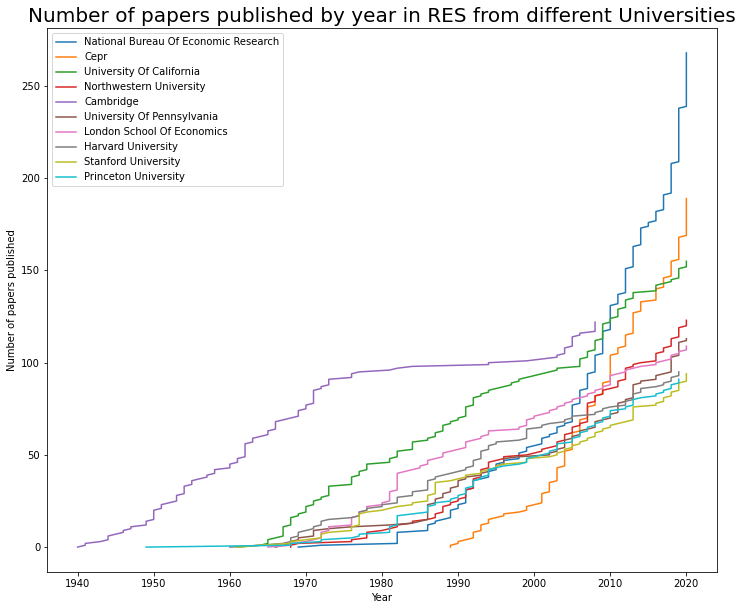

In [17]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in RES from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()